In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [5]:
data=pd.read_csv('hotel_bookings.csv')

In [9]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
data['company'].value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

In [12]:
zero_count = (data['lead_time'] == 0).sum()

In [13]:
zero_count

6345

In [14]:
data['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [15]:
data['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [ ]:
columns_to_drop = ['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month,babies','market_segment',
'previous_bookings_not_canceled','previous_cancellations','booking_changes','deposit_type','company','days_in_waiting_list','customer_type',
reservation_status_date','reservation_status','total_of_special_requests']  
data.drop(columns=columns_to_drop, inplace=True)

In [18]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
hotel_data_subset = data[['hotel', 'is_canceled', 'lead_time','stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children',  'meal',
       'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',  'agent','adr','required_car_parking_spaces', ]]

In [21]:
hotel_data_subset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'agent', 'adr', 'required_car_parking_spaces'],
      dtype='object')

In [22]:
hotel_data_subset.isna().sum()

hotel                              0
is_canceled                        0
lead_time                          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           4
meal                               0
distribution_channel               0
is_repeated_guest                  0
reserved_room_type                 0
assigned_room_type                 0
agent                          16340
adr                                0
required_car_parking_spaces        0
dtype: int64

In [23]:
hotel_data_subset[hotel_data_subset['children'].isna()]

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,agent,adr,required_car_parking_spaces
40600,City Hotel,1,2,1,0,2,NaN,BB,Undefined,0,B,B,NaN,12.0,0
40667,City Hotel,1,1,0,2,2,NaN,BB,Undefined,0,B,B,14.0,12.0,0
40679,City Hotel,1,1,0,2,3,NaN,BB,Undefined,0,B,B,NaN,18.0,0
41160,City Hotel,1,8,2,5,2,NaN,BB,Undefined,0,B,B,9.0,76.5,0


In [24]:
hotel_data_subset = hotel_data_subset.dropna(subset=['children'])

In [25]:
hotel_data_subset.isna().sum()

hotel                              0
is_canceled                        0
lead_time                          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           0
meal                               0
distribution_channel               0
is_repeated_guest                  0
reserved_room_type                 0
assigned_room_type                 0
agent                          16338
adr                                0
required_car_parking_spaces        0
dtype: int64

In [26]:
hotel_data_subset['agent'].value_counts()

agent
9.0      31960
240.0    13922
1.0       7191
14.0      3639
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [29]:
hotel_data_subset = hotel_data_subset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = hotel_data_subset.corr()

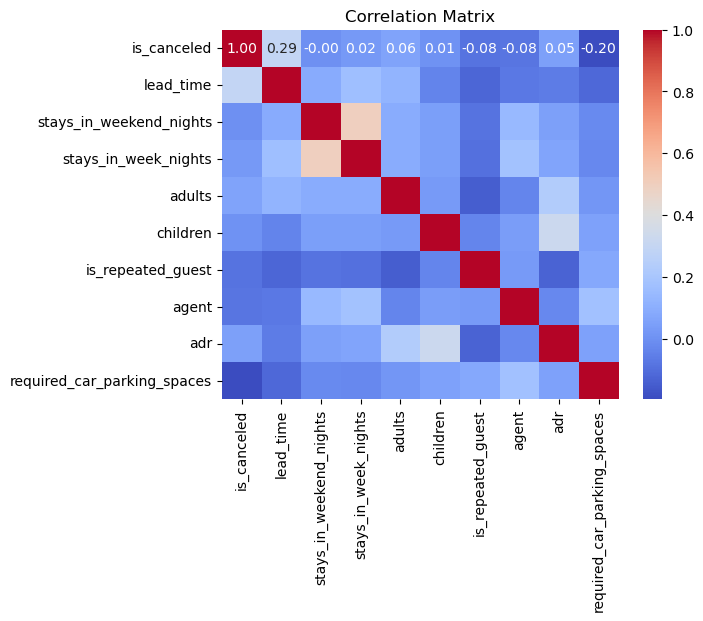

In [30]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [43]:
print(hotel_data_subset.columns)

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'is_repeated_guest',
       'agent', 'adr', 'required_car_parking_spaces'],
      dtype='object')


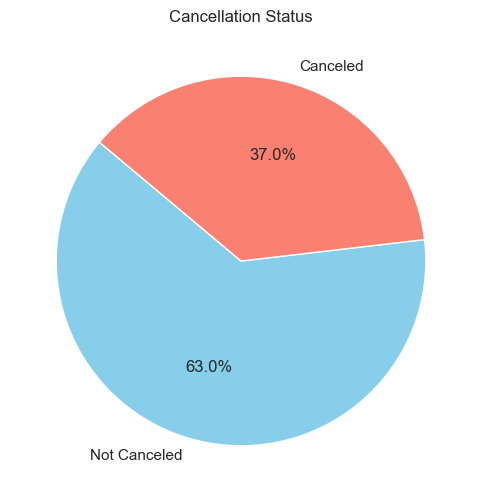

In [108]:
is_canceled_counts = hotel_data_subset['is_canceled'].value_counts()

is_canceled_counts = hotel_data_subset['is_canceled'].value_counts()

custom_labels = ['Not Canceled', 'Canceled']

custom_colors = ['skyblue', 'salmon']

plt.figure(figsize=(6, 6))
plt.pie(is_canceled_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Cancellation Status')
plt.show()

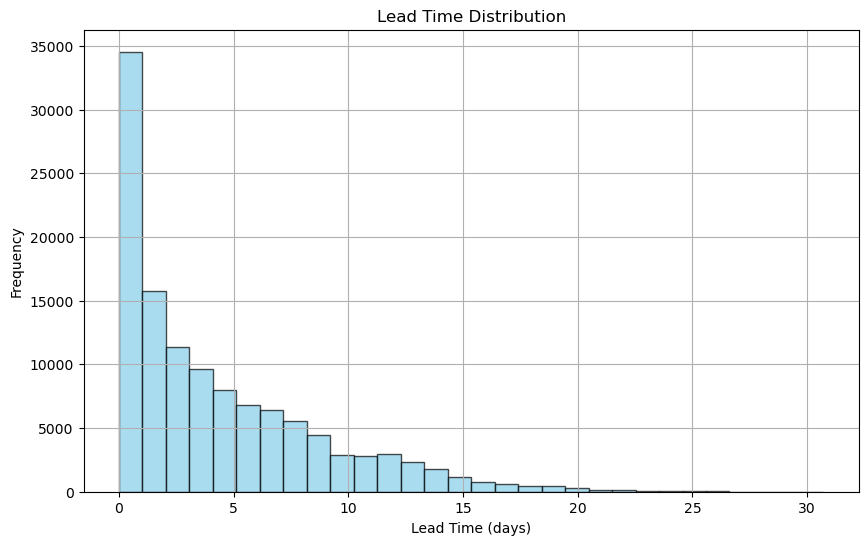

In [61]:
hotel_data_subset['lead_time_days'] = hotel_data_subset['lead_time'] / 24

lead_time_days_data = hotel_data_subset['lead_time_days']

plt.figure(figsize=(10, 6))
plt.hist(lead_time_days_data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Insight:
#### Lead time, defined as the duration from booking to customer check-in, typically varies among guests. While many guests book on the same day as check-in or directly at the counter, a considerable portion prefers to reserve accommodations well in advance, ranging from two to twenty days prior to their stay.

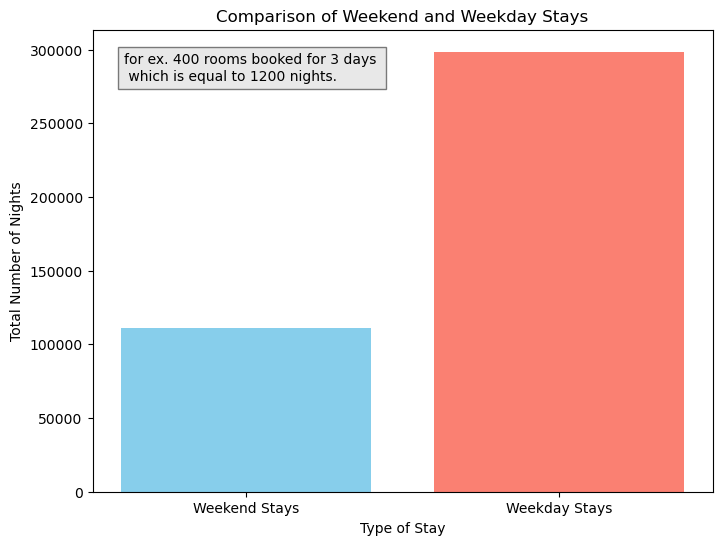

In [74]:
total_weekend_stays = hotel_data_subset['stays_in_weekend_nights'].sum()
total_weekday_stays = hotel_data_subset['stays_in_week_nights'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Weekend Stays', 'Weekday Stays'], [total_weekend_stays, total_weekday_stays], color=['skyblue', 'salmon'])
plt.title('Comparison of Weekend and Weekday Stays')
plt.xlabel('Type of Stay')
plt.ylabel('Total Number of Nights')

note = "for ex. 400 rooms booked for 3 days \n which is equal to 1200 nights."
plt.text(0.05, 0.95, note, ha='left', va='top', fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.show()

# Insight:
#### The discrepancy in bar length between weekends and weekdays may stem from the hotel's heavy weekday occupancy with corporate events like seminars and official dinners. Weekdays see heightened demand, necessitating longer bar hours, while weekends experience fewer such events, resulting in shorter bar operations.

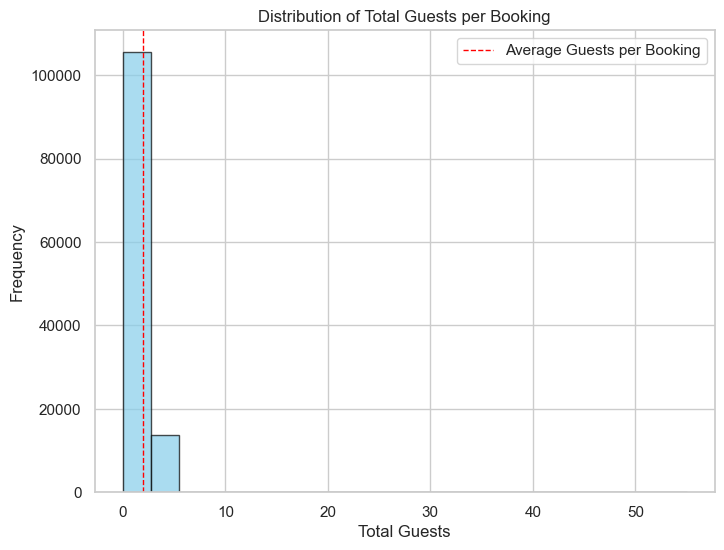

In [84]:
hotel_data_subset['total_guests'] = hotel_data_subset['adults'] + hotel_data_subset['children']
average_guests_per_booking = hotel_data_subset['total_guests'].mean()

plt.figure(figsize=(8, 6))
plt.hist(hotel_data_subset['total_guests'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=average_guests_per_booking, color='red', linestyle='dashed', linewidth=1, label='Average Guests per Booking')
plt.title('Distribution of Total Guests per Booking')
plt.xlabel('Total Guests')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)
plt.show()

# Insight:
### With an average guest count of 1.9 per booking, the hotel can anticipate an approximate expectation of two persons per reservation.

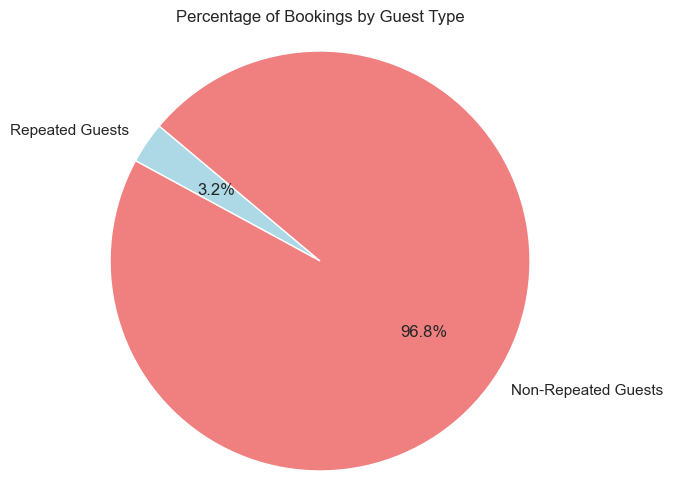

In [85]:
repeated_guest_percentage = (hotel_data_subset['is_repeated_guest'].sum() / len(hotel_data_subset)) * 100
non_repeated_guest_percentage = 100 - repeated_guest_percentage

labels = ['Repeated Guests', 'Non-Repeated Guests']
sizes = [repeated_guest_percentage, non_repeated_guest_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Bookings by Guest Type')
plt.axis('equal')  
plt.show()

# Insight:
### The hotel's repeated guest percentage stands at 3.2%, significantly below the industry's typical retention rate of 55%. This discrepancy suggests a notable gap in guest loyalty compared to standard hospitality benchmarks. Addressing this issue may involve implementing targeted loyalty programs, enhancing guest experiences, and optimizing customer engagement strategies to foster greater guest loyalty and encourage return visits, thereby aligning with industry norms and enhancing overall guest satisfaction and retention rates.

In [87]:
print(hotel_data_subset.columns)

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'is_repeated_guest',
       'agent', 'adr', 'required_car_parking_spaces', 'lead_time_days',
       'total_guests'],
      dtype='object')


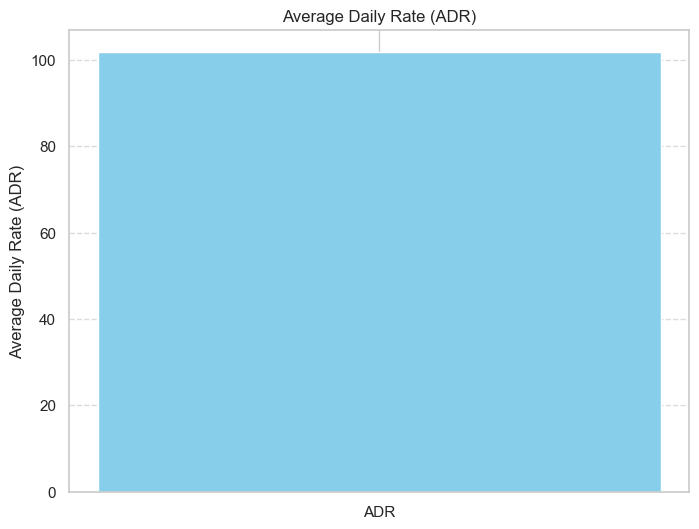

In [88]:
# Calculate the total room revenue
total_revenue = hotel_data_subset['adr'].sum()

total_rooms_sold = len(hotel_data_subset)

adr = total_revenue / total_rooms_sold

plt.figure(figsize=(8, 6))
plt.bar(['ADR'], [adr], color='skyblue')
plt.title('Average Daily Rate (ADR)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

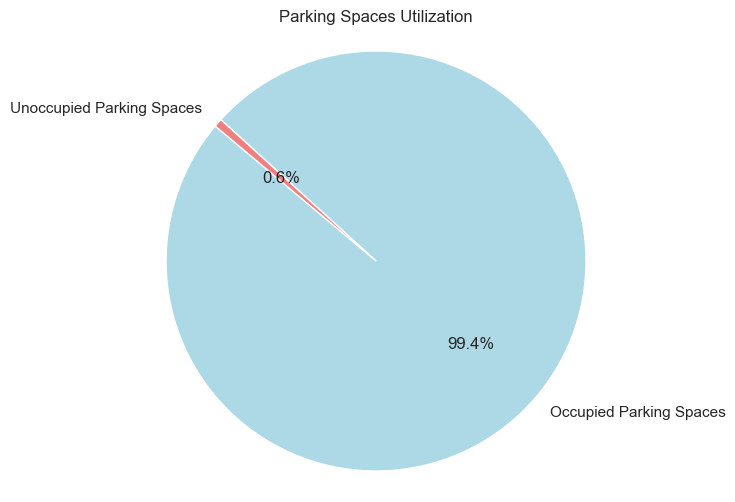

In [92]:
total_bookings = len(hotel_data_subset)

total_parking_spaces = hotel_data_subset['required_car_parking_spaces'].sum()

occupied_parking_spaces = hotel_data_subset[hotel_data_subset['required_car_parking_spaces'] > 0]['required_car_parking_spaces'].count()

occupied_percentage = (occupied_parking_spaces / total_parking_spaces) * 100

unoccupied_percentage = 100 - occupied_percentage

labels = ['Occupied Parking Spaces', 'Unoccupied Parking Spaces']
sizes = [occupied_percentage, unoccupied_percentage]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Parking Spaces Utilization')
plt.axis('equal')  
plt.show()

# Insight:
#### The graph illustrates parking occupancy at 99.4%, indicating high demand and suggesting positive performance for the hotel. Full parking capacity often correlates with increased guest patronage and revenue generation, reflecting favorably on the hotel's operations and popularity.

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = hotel_data_subset['lead_time'].values.reshape(-1, 1)  # Reshape X to make it 2D
y = hotel_data_subset['adr'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 2317.6855917213265
Coefficients: [-0.02950537]
Intercept: 104.88361263291473


# Result:
##### These results provide insights into the relationship between lead time and ADR,suggesting that as lead time increases, the ADR tends to decrease,with an intercept value of 104.88 when lead time is zero

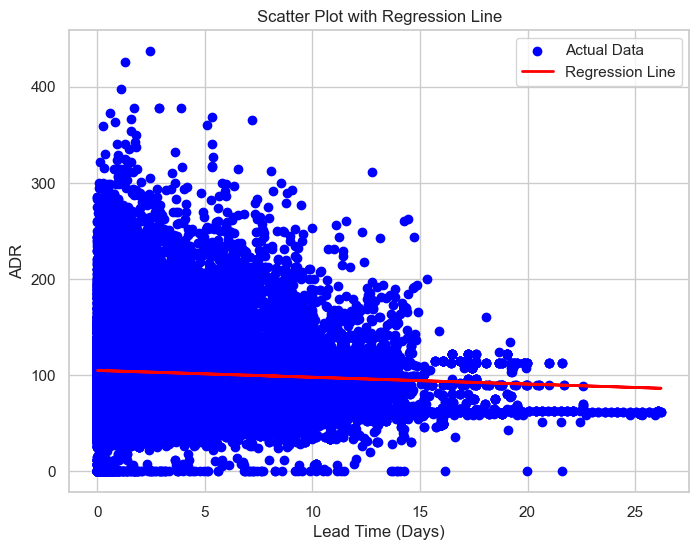

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_days, y_test, color='blue', label='Actual Data')

#reegression line
plt.plot(X_test_days, predictions_days, color='red', linewidth=2, label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Lead Time (Days)')
plt.ylabel('ADR')
plt.legend()
plt.grid(True)
plt.show()